In [1]:
import os
import astropy.coordinates as astro_coord
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

%matplotlib inline

In [2]:
def load_galah_sample():
    from astropy.table import Table
    merged_file='/volumes/LaCie/galah_merged.fits'
    galah= Table.read(merged_file).to_pandas()
    galah['vtot']= (galah['vx_gala (km/s)']**2+galah['vy_gala (km/s)']**2+galah['vz_gala (km/s)']**2)**0.5
    galah['pmracosdec']=galah.pmra_edr3*np.cos(galah.dec_edr3*u.degree)
    return galah.rename(columns={'vx_gala (km/s)': 'v_x', \
                      'vy_gala (km/s)': 'v_y',  \
                      'vz_gala (km/s)': 'v_z',
                     'fe_h': '[Fe/H]', 
                    'alpha_fe': '[alpha/Fe]',
                    'Jz (kpc2/Myr)': 'Jz',
                    'age_bstep': 'age1', 
                    'ra_edr3': 'ra_gaia',\
                     'dec_edr3': 'de_gaia', \
                     'pmdec_edr3': 'pmde',\
                      'pmra_edr3': 'pmra', 
                     'parallax_edr3': 'plx',\
                    'parallax_error_edr3': 'eplx',
                     'rv_galah': 'rv'})[['star_id','v_x', 'v_y', 'v_z', 'vtot', '[Fe/H]', \
                                         'Jz', 'age1', 'ra_gaia', 'de_gaia', \
                                         'pmracosdec',   'eplx', 'pmde', 'pmra', 'plx', 'rv','[alpha/Fe]']]


In [3]:
df=load_galah_sample()

In [4]:
#list(np.sort(df.columns))

In [5]:
df.to_csv('/users/caganze/research/quickage/data/galah_lite.csv.gz', compression='gzip')

[(-0.1, 1.0), Text(0, 0.5, 'Jz'), Text(0.5, 0, '[Fe/H]'), (-3.0, 1.0)]

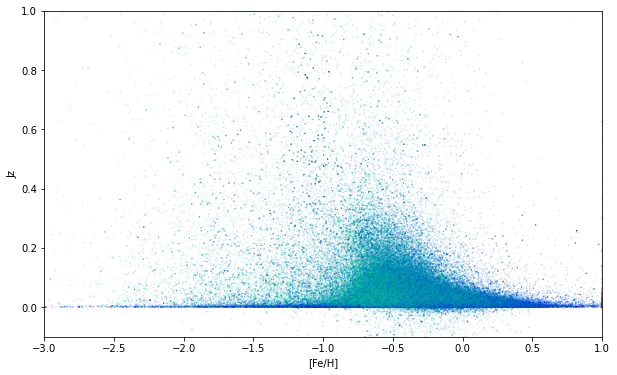

In [6]:
fig, ax=plt.subplots(figsize=(10, 6))
ax.scatter( df['[Fe/H]'], df['Jz'], s=.01, c=df.age1, cmap='winter', vmin=0, vmax=13)
ax.set(ylim=[-0.1, 1], ylabel='Jz', xlabel='[Fe/H]',  xlim=[-3, 1],)

[Text(0, 0.5, 'Age (Gyr)')]

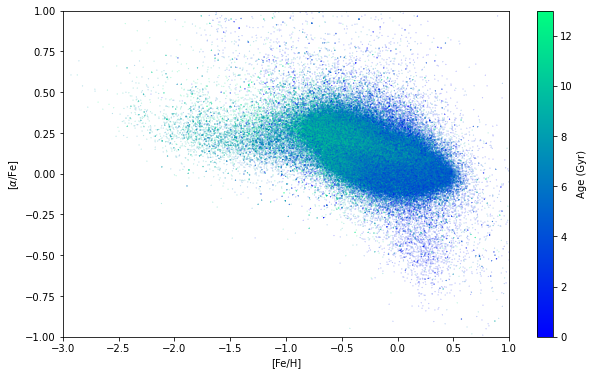

In [7]:
fig, ax=plt.subplots(figsize=(10, 6))
c=ax.scatter( df['[Fe/H]'], df['[alpha/Fe]'], s=.01, c=df.age1, cmap='winter', vmin=0, vmax=13)
ax.set( ylabel=r'[$\alpha$/Fe]', xlabel='[Fe/H]', xlim=[-3, 1], ylim=[-1, 1])
cx=plt.colorbar(c)
cx.ax.set(ylabel='Age (Gyr)')

In [ ]:
#try published results
#ross 19
#trappist 1